# Polygon

In [29]:
import csv # import csv library  
import shapefile

- csv.DictReader()

In [13]:
# reshape csv
count = 0
new = []
with open("RealPropertiesExtra.csv") as p:
    
    reader = csv.DictReader(p)
    for row in reader:
        temp = {}
        temp['CxHull'] = row["CxHull"]
        temp['IsVacant'] = row["IsVacant"]
        temp['ID'] = row['ID']
        temp['IsMCC'] = row['IsMCC']
        temp['BlockLot'] = row['BlockLot']
        temp['FullAddress'] = row['FullAddress']
        count += 1
        try:
            temp['Parcel'] = row['Parcel']+ ", "+ ",".join(row[None])
        except:
            print row
            continue
        
        
        new.append(temp)     

{'Parcel': None, 'CxHull': None, 'IsVacant': None, 'ID': '(223231 rows affected)', 'IsMCC': None, 'BlockLot': None, 'FullAddress': None}


- csv.DictWriter(csvfile, fieldnames=columns_name)

> writer.writeheader()

> writer.writerows(new)

In [15]:
with open('RealPropertiesExtraClean.csv', 'w') as csvfile:
    fieldnames = new[-1].keys()
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(new)

### Get polygon from CSV

> 1. convert csv 2 shp

> https://github.com/GeospatialPython/Learn/blob/master/csv2shp.py

> 2. convert string to polygon

> **https://gis.stackexchange.com/questions/215408/convert-polygon-to-multipolygon-with-shapely**

In [25]:
from matplotlib import pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Polygon, mapping
from shapely.geometry.multipolygon import MultiPolygon
%matplotlib inline

In [26]:
import seaborn as sns
sns.set_style('darkgrid')

In [27]:
from shapely import wkt
p = wkt.loads('POLYGON ((-76.612946817291814 39.304993529996125,  -76.612734988271256 39.305001340750273, -76.612737394206746 39.30503357578926, -76.612707071892345 39.305034692835477, -76.612666805612193 39.305036177017413, -76.612126469119545 39.305056082833794, -76.612127460916625 39.305068936326869, -76.612134609790161 39.305111762126216, -76.6121426670222 39.305137953041466, -76.61214749074631 39.30515375639564, -76.612165965075334 39.305194478339558, -76.612189813845717 39.305233515714193, -76.612209960120921 39.30525917194192, -76.612218733692444 39.305270344944844, -76.612252507927252 39.305304639191135, -76.61229067955297 39.305336009669219, -76.6123328610711 39.305364096643515, -76.612378634191984 39.305388628483463, -76.612427393999312 39.305409298503925, -76.612478721473479 39.305425884976067, -76.612531981502229 39.305438225552074, -76.6125866080936 39.305446173575874, -76.612642001557845 39.3054496233987, -76.612697560746753 39.305448570577774, -76.612685646136512 39.305289028145026, -76.6127270128874 39.30528750084374, -76.6127562607876 39.305286422773804, -76.612968054489954 39.305278608348729, -76.612946817291814 39.304993529996125), (-76.612743527250572 39.305115795442525, -76.6127539842261 39.305255923502166, -76.612724606934819 39.305257007822433, -76.612683368698356 39.305258529220538, -76.612682116393458 39.305241756482204, -76.61267292816747 39.3051183973429, -76.6127135564417 39.3051168992408, -76.612743527250572 39.305115795442525))')
#p = wkt.loads('POLYGON ((-76.651059932578775 39.309309970681667,  -76.651009634018692 39.309311632552479, -76.651025889343416 39.309541452211469, -76.651075728787248 39.309539816029726, -76.651075133749089 39.309531576878122, -76.651060492329336 39.309318209729135, -76.651059932578775 39.309309970681667))')
m = MultiPolygon([p])
#m = Polygon(p)

(39.304993529996125, 39.3054496233987)

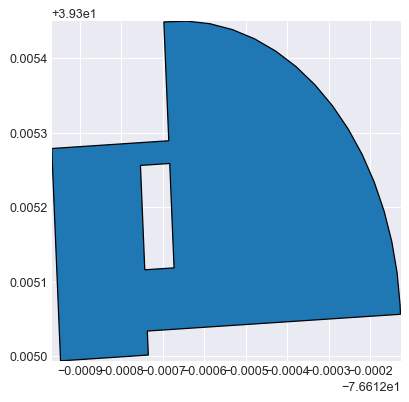

In [28]:
fig = plt.figure(1, figsize=(5,5), dpi=90)
ax = fig.add_subplot(111)

ring_patch = PolygonPatch(m)
ax.add_patch(ring_patch)

r = m.bounds[2] # max(m.exterior.coords.xy[0])
l = m.bounds[0] # min(m.exterior.coords.xy[0])
u = m.bounds[3] # max(m.exterior.coords.xy[1])
d = m.bounds[1] # min(m.exterior.coords.xy[1])
ax.set_xlim(l,r)
ax.set_ylim(d,u)

In [6]:
# get a list of polygon
poly_collect = []

# Open the csv file and set up a reader
with open("RealPropertiesExtraClean.csv") as csv_file:
    reader = csv.DictReader(csv_file)
    for row in reader:
        p = wkt.loads(row['Parcel'])
        m = MultiPolygon([p])
        poly_collect.append(m)

In [19]:
print "length:", len(poly_collect)
import sys
import time

length: 223231


223231time: 677.17280817


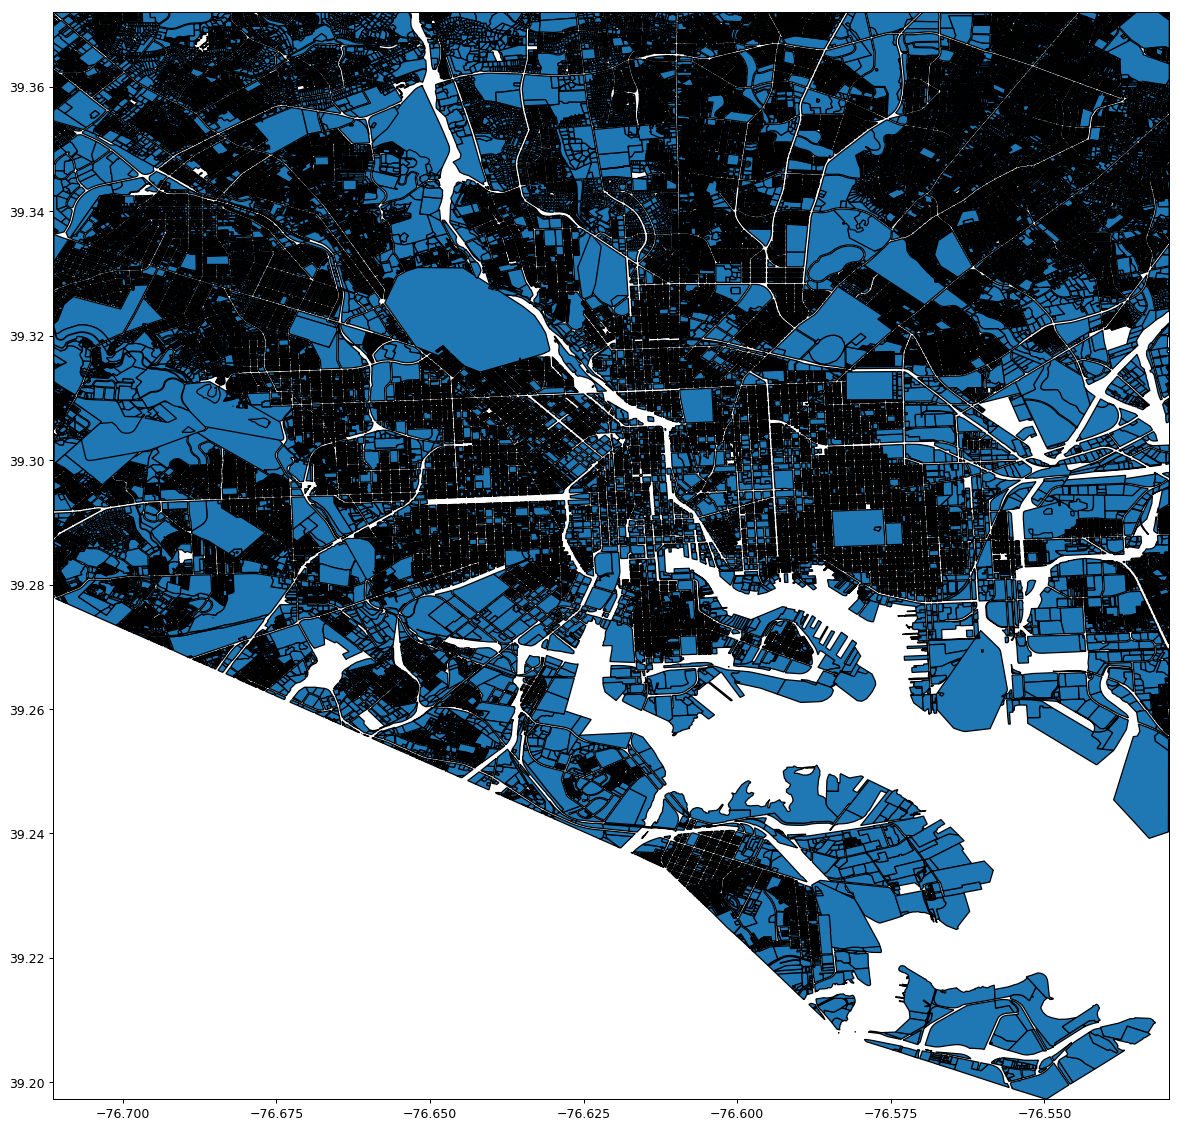

In [20]:
counter = 0
s = time.time()

fig = plt.figure(1, figsize=(16,16), dpi=90)
ax = fig.add_subplot(111)

r,u,l,d = -float('inf'), -float('inf'), float('inf'), float('inf')
for multipoly in poly_collect[:]:
    ring_patch = PolygonPatch(multipoly)
    ax.add_patch(ring_patch)

    r = max(r,multipoly.bounds[2]) # max(m.exterior.coords.xy[0])
    l = min(l,multipoly.bounds[0]) # min(m.exterior.coords.xy[0])
    u = max(u,multipoly.bounds[3])# max(m.exterior.coords.xy[1])
    d = min(d,multipoly.bounds[1]) # min(m.exterior.coords.xy[1])
    
    counter += 1
    sys.stdout.write("\r" + str(counter))
    sys.stdout.flush()

        
ax.set_xlim(l,r);
ax.set_ylim(d,u);
print "time:", time.time()-s

https://stackoverflow.com/questions/12881848/draw-polygons-more-efficiently-with-matplotlib

## Polygon Reference 

https://stackoverflow.com/questions/20474549/extract-points-coordinates-from-python-shapely-polygon

https://gis.stackexchange.com/questions/180142/converting-shapely-multipolygon-to-polygon-technique-doesnt-always-work

https://gist.github.com/urschrei/6436526